# Módulo de Programação Python

# Trilha Python - Aula 21: Modulos e Pacotes - Avançado

<img align="center" style="padding-right:10px;" src="Figuras/aula-25_fig_01.png">

## Gráficos com Pandas



In [2]:
def printVersions(pacotes):
    for pacote in pacotes:
        try:
            print(f'{pacote} version: {pacote.__version__}')
        except ImportError:
            print(f'{pacote} is not installed')

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
printVersions([np, pd, mplt, sns])

<module 'numpy' from '/opt/anaconda3/envs/pyTIC18/lib/python3.10/site-packages/numpy/__init__.py'> version: 1.26.2
<module 'pandas' from '/opt/anaconda3/envs/pyTIC18/lib/python3.10/site-packages/pandas/__init__.py'> version: 2.1.4
<module 'matplotlib' from '/opt/anaconda3/envs/pyTIC18/lib/python3.10/site-packages/matplotlib/__init__.py'> version: 3.8.2
<module 'seaborn' from '/opt/anaconda3/envs/pyTIC18/lib/python3.10/site-packages/seaborn/__init__.py'> version: 0.13.1


O método ``plot`` em ``Series`` e ``DataFrame`` é apenas um _wrapper_ simples em torno da função ``plt.plot``

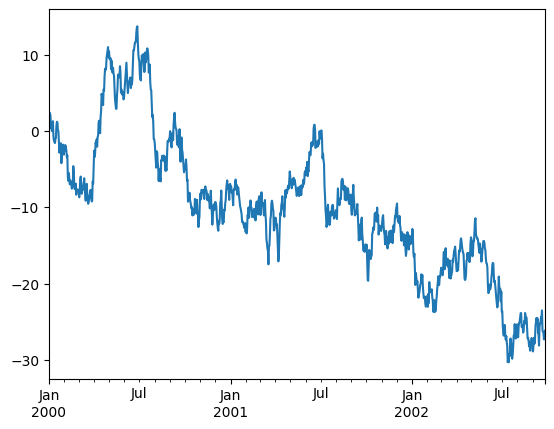

In [9]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot();

Se o índice consistir em datas, o método chama ``gcf().autofmt_xdate()`` para tentar formatar de forma apropriada o eixo x conforme acima. O método usa também diversos argumentos para controlar a aparência do gráfico.

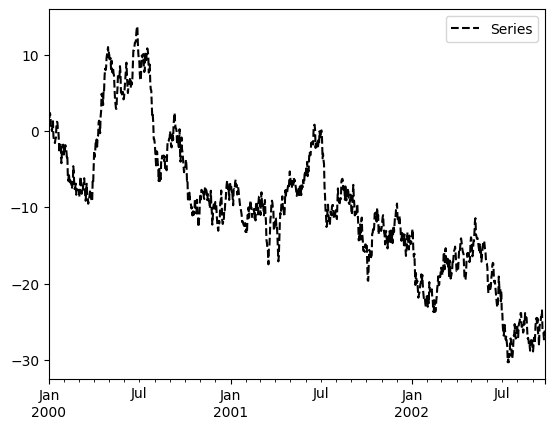

In [10]:
plt.figure() 
ts.plot(style='k--', label='Series') 
plt.legend()

No DataFrame, ``plot`` é configurado para plotar todas as colunas com rótulos.

<Figure size 640x480 with 0 Axes>

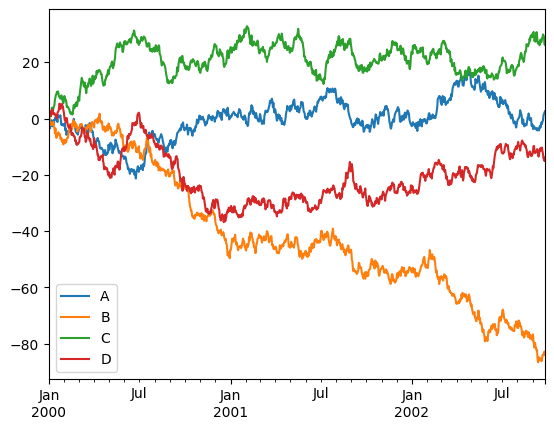

In [11]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best');

Podemos definir o argumento da legenda como ``False`` para ocultar a mesma, que é mostrada por padrão.

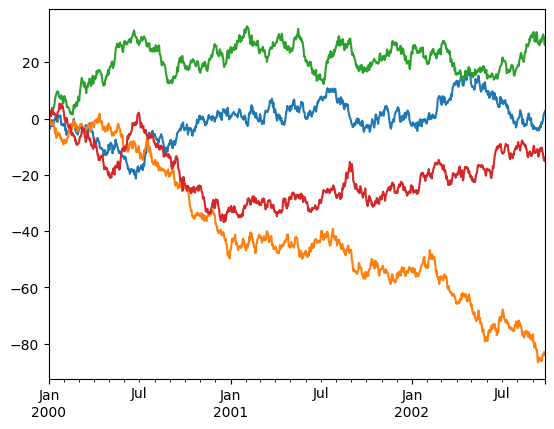

In [12]:
df.plot(legend=False);

Algumas outras opções estão disponíveis, como plotar cada série em um eixo diferente.

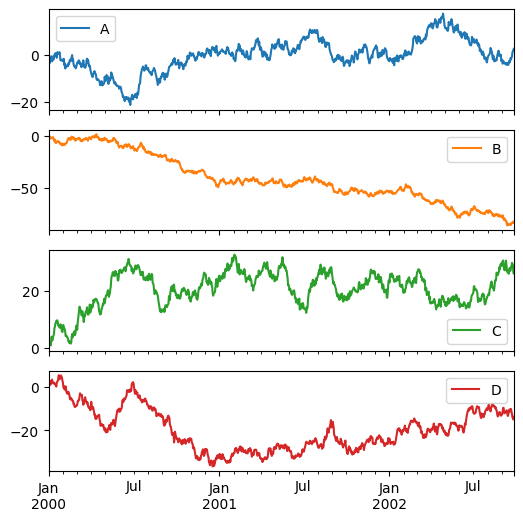

In [13]:
df.plot(subplots=True, figsize=(6, 6)) 
plt.legend(loc='best');

Você pode passar ``logy`` para obter um eixo Y em escala logarítmica

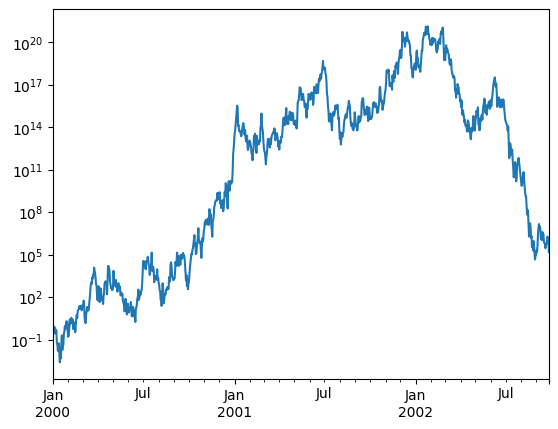

In [14]:
plt.figure();
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True);

Também é possível plotar uma coluna versus outra usando as palavras-chave ``x`` e ``y`` no ``DataFrame.plot``.

<Figure size 640x480 with 0 Axes>

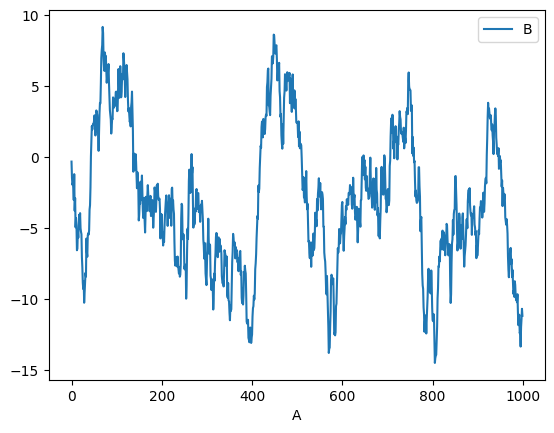

In [16]:
plt.figure();
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B');

Para plotar dados em um eixo ``y`` secundário, use a palavra-chave ``secondary_y``.

<Axes: >

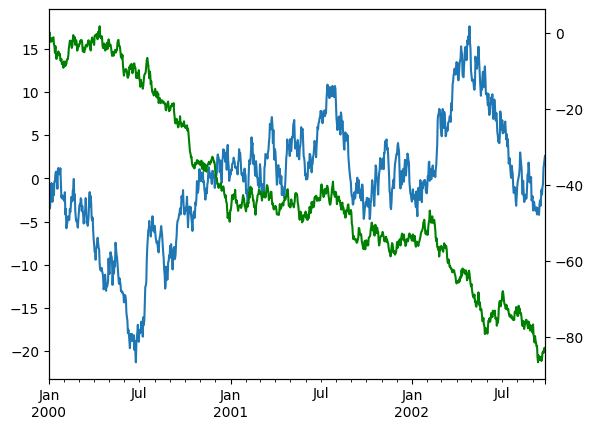

In [17]:
plt.figure();
df.A.plot();
df.B.plot(secondary_y=True, style='g')

Para plotar algumas colunas em um ``DataFrame``, dê os nomes das colunas à palavra-chave ``secondary_y``.

<Figure size 640x480 with 0 Axes>

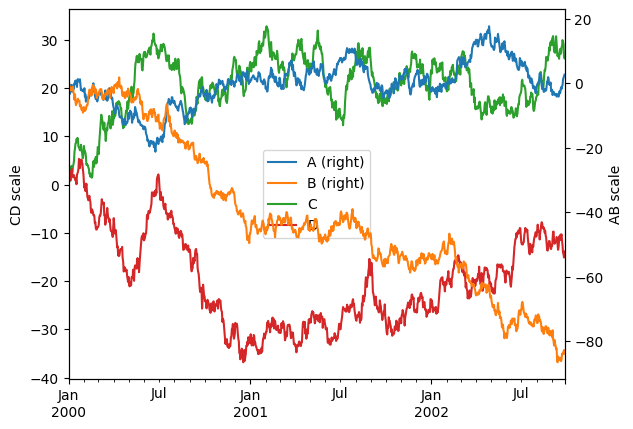

In [18]:
plt.figure();
ax = df.plot(secondary_y=['A', 'B']);
ax.set_ylabel('CD scale');
ax.right_ax.set_ylabel('AB scale');